In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.linear_model import Lasso, Ridge, RidgeCV, LassoCV, LinearRegression

from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_score, StratifiedKFold

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder, LabelBinarizer, LabelEncoder, PowerTransformer

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectPercentile, SelectFromModel, f_regression, RFECV

from sklearn.pipeline import Pipeline

from sklearn.base import TransformerMixin, BaseEstimator

from sklearn_pandas import DataFrameMapper

from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm
from scipy.stats import boxcox

import xgboost as xgb
import math

%matplotlib inline

In [3]:
ames = pd.read_csv('train.csv', index_col=False)
pd.set_option('display.max_columns', None)

In [865]:
ames.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [464]:
ames.groupby('MSZoning').agg({'SalePrice': ['mean', 'count']})

SalePrice      
                   mean count
MSZoning                     
C (all)    74528.000000    10
FV        214014.061538    65
RH        131558.375000    16
RL        191004.994787  1151
RM        126316.830275   218

In [4]:
ames['LotFrontage'].sort_values(ascending=False).head()

981     313.0
2008    200.0
527     195.0
1146    174.0
74      168.0
Name: LotFrontage, dtype: float64

In [5]:
ames['LotArea'].sort_values(ascending=False).head()

355     215245
1634    164660
249     159000
1271    115149
1955     70761
Name: LotArea, dtype: int64

In [6]:
ames['MiscVal'].sort_values(ascending=False).head(10)

105     15500
1526    12500
2106     8300
42       6500
2505     4500
1832     4500
2425     3500
191      3000
1008     2500
1151     2500
Name: MiscVal, dtype: int64

In [7]:
ames.iloc[[981]]

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
981,982,535427070,2069,242000,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425.0,Unf,0.0,160.0,585.0,GasA,Ex,Y,SBrkr,2069,0,0,1.0,0.0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2.0,505.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal


In [8]:
ames.iloc[[355]]

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
355,356,916176125,2036,375000,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236.0,Rec,820.0,80.0,2136.0,GasW,TA,Y,SBrkr,2036,0,0,2.0,0.0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2.0,513.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal


In [9]:
ames.iloc[[105]]

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
105,106,534275170,958,151500,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,8,1960,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,Mn,BLQ,498.0,Unf,0.0,460.0,958.0,GasA,TA,Y,SBrkr,958,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1960.0,RFn,1.0,301.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Gar2,15500,4,2007,WD,Normal


In [10]:
ames.shape

(2580, 82)

In [11]:
ames.drop('Unnamed: 0', axis=1, inplace = True)

In [12]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseSty

In [446]:
describe = pd.DataFrame(ames.describe().T)
describe.to_csv('description.csv')

In [14]:
# find na

for feature in ames:
    if ames[feature].isna().sum() > 0:
        print( f' {feature} has {ames[feature].isna().sum()} missing values' )

 LotFrontage has 462 missing values
 Alley has 2412 missing values
 MasVnrType has 14 missing values
 MasVnrArea has 14 missing values
 BsmtQual has 69 missing values
 BsmtCond has 69 missing values
 BsmtExposure has 71 missing values
 BsmtFinType1 has 69 missing values
 BsmtFinSF1 has 1 missing values
 BsmtFinType2 has 70 missing values
 BsmtFinSF2 has 1 missing values
 BsmtUnfSF has 1 missing values
 TotalBsmtSF has 1 missing values
 Electrical has 1 missing values
 BsmtFullBath has 2 missing values
 BsmtHalfBath has 2 missing values
 FireplaceQu has 1241 missing values
 GarageType has 127 missing values
 GarageYrBlt has 129 missing values
 GarageFinish has 129 missing values
 GarageCars has 1 missing values
 GarageArea has 1 missing values
 GarageQual has 129 missing values
 GarageCond has 129 missing values
 PoolQC has 2571 missing values
 Fence has 2055 missing values
 MiscFeature has 2483 missing values


In [15]:
ames['PoolQC'].unique()

array([nan, 'Ex', 'Gd', 'Fa', 'TA'], dtype=object)

In [16]:
ames['Fence'].unique()

array([nan, 'GdWo', 'MnPrv', 'GdPrv', 'MnWw'], dtype=object)

In [17]:
ames['FireplaceQu'].unique()

array(['Gd', nan, 'Ex', 'TA', 'Fa', 'Po'], dtype=object)

In [18]:
ames['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [19]:
corr = ames.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace = True)
print(corr['SalePrice'].head(10))

SalePrice      1.000000
OverallQual    0.790501
GrLivArea      0.719981
TotalBsmtSF    0.652222
1stFlrSF       0.642613
GarageCars     0.638801
GarageArea     0.634992
YearBuilt      0.544370
FullBath       0.534982
GarageYrBlt    0.520763
Name: SalePrice, dtype: float64


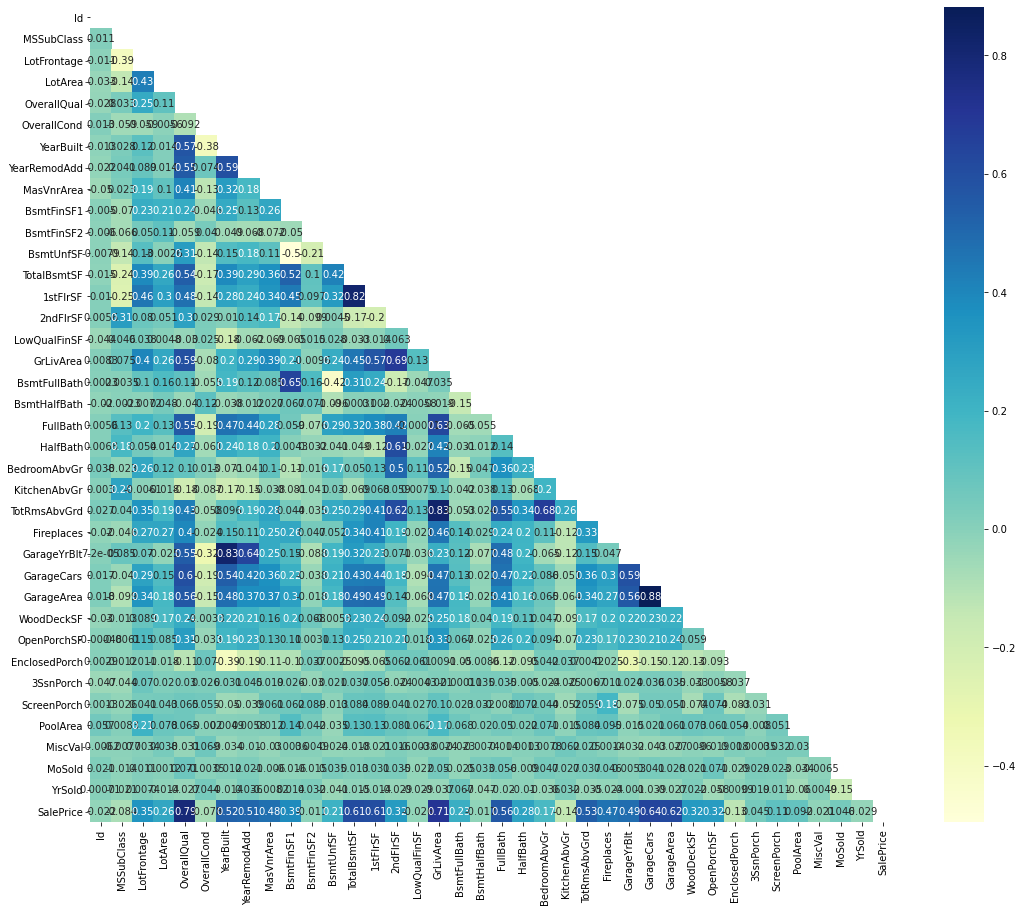

In [404]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize= (18,15))

ax = sns.heatmap(ames.corr(), mask=mask, ax=ax, annot=True, cmap="YlGnBu")

plt.savefig("corrplot.png")
plt.show()

In [21]:
ames['OverallQual'].isnull().sum(), ames['GrLivArea'].isnull().sum()

(0, 0)

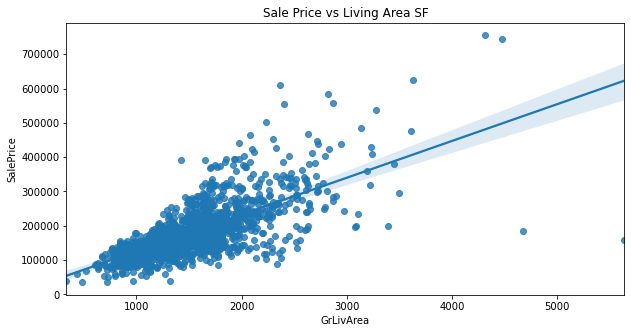

In [405]:
fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="GrLivArea", y="SalePrice", data=ames, ax=ax)
ax.set_title('Sale Price vs Living Area SF')

plt.savefig("GrLivArea_SalePrice.png")

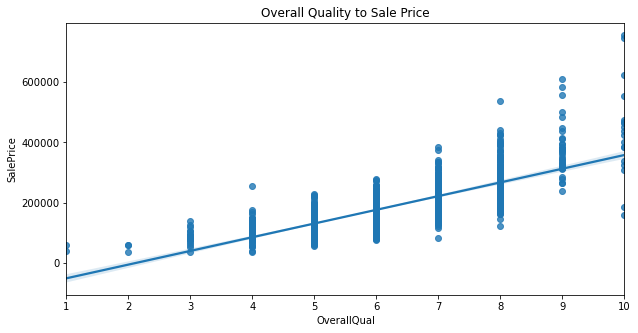

In [449]:
fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="OverallQual", y="SalePrice", data=ames, ax=ax)
ax.set_title('Overall Quality to Sale Price')

plt.savefig("Quality_to_Price.png")

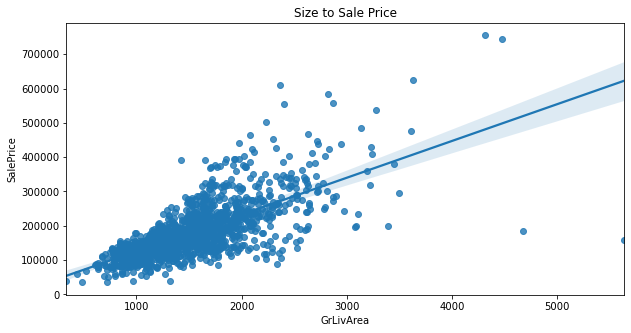

In [451]:
fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="GrLivArea", y="SalePrice", data=ames, ax=ax)
ax.set_title('Size to Sale Price')

plt.savefig("Size_to_Price.png")

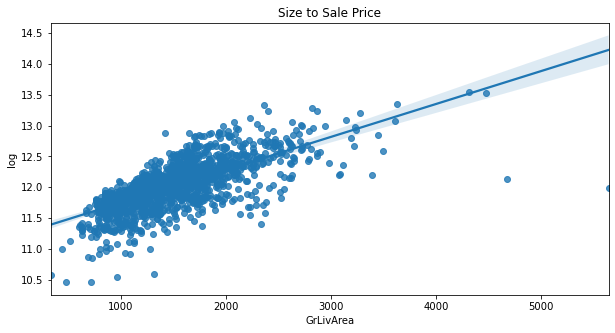

In [460]:
fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="GrLivArea", y="log", data=ames, ax=ax)
ax.set_title('Size to Sale Price')

plt.savefig("logSize_to_Price.png")

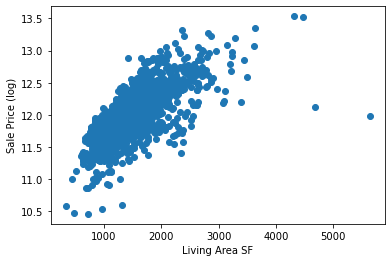

In [406]:
plt.scatter(ames['GrLivArea'], np.log(ames['SalePrice']))
plt.xlabel("Living Area SF")
plt.ylabel("Sale Price (log)")

plt.savefig("GrLivArea_logSalePrice.png")

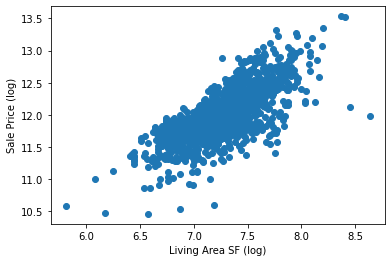

In [407]:
plt.scatter(np.log(ames['GrLivArea']), np.log(ames['SalePrice']))
plt.xlabel("Living Area SF (log)")
plt.ylabel("Sale Price (log)")

plt.savefig("logGrLivArea_logSalePrice.png")


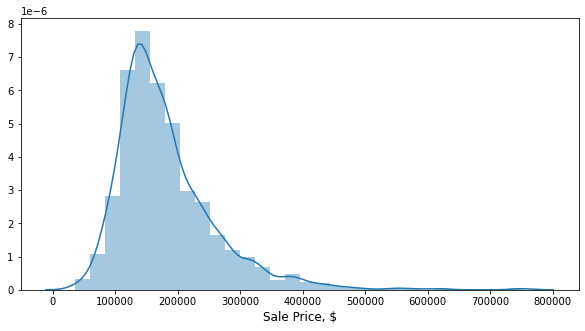

In [419]:
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(ames.SalePrice, bins=30, kde=True, ax=ax)
plt.xlabel('Sale Price, $', fontsize=12);
plt.savefig("Distplot_Sale_Price.png")

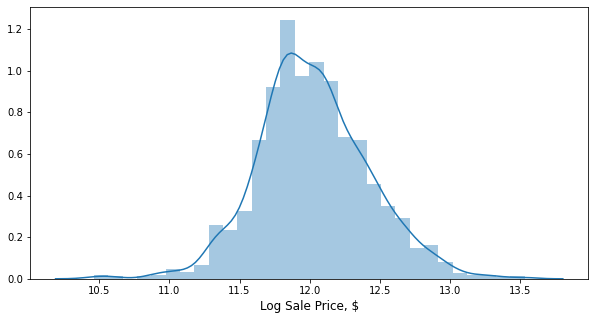

In [447]:
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(ames.log, bins=30, kde=True, ax=ax)
plt.xlabel('Log Sale Price, $', fontsize=12);
plt.savefig("Distplot_log_Sale_Price.png")

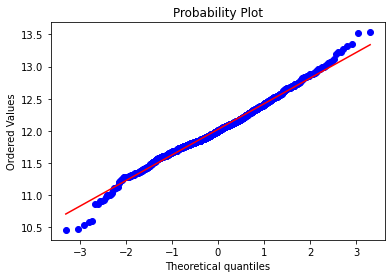

In [762]:
from scipy import stats
# sm.qqplot(np.log(ames.SalePrice), dist='norm')
# plt.show()

stats.probplot(np.log(ames.SalePrice), dist='norm', plot=plt)

plt.savefig("probplot_logSalePrice.png")

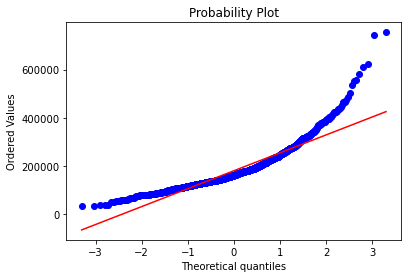

In [761]:

stats.probplot(ames.SalePrice, dist='norm', plot=plt)

# sm.qqplot(ames.SalePrice, dist='norm')
# plt.show()

plt.savefig("probplot_SalePrice.png")

(array([0.02227977, 0.02227977, 0.01113988, 0.        , 0.        ,
        0.        , 0.02227977, 0.03341965, 0.04455954, 0.03341965,
        0.05569942, 0.01113988, 0.05569942, 0.23393756, 0.24507744,
        0.25621733, 0.20051791, 0.32305663, 0.64611326, 0.62383349,
        0.72409245, 1.11398838, 1.35906583, 1.0360092 , 1.00258955,
        0.91347047, 1.20310745, 1.01372943, 0.71295257, 0.61269361,
        0.64611326, 0.56813408, 0.51243466, 0.46787512, 0.25621733,
        0.32305663, 0.24507744, 0.14481849, 0.14481849, 0.14481849,
        0.07797919, 0.05569942, 0.04455954, 0.01113988, 0.02227977,
        0.02227977, 0.02227977, 0.        , 0.        , 0.02227977]),
 array([10.46024211, 10.52172673, 10.58321134, 10.64469596, 10.70618058,
        10.7676652 , 10.82914982, 10.89063444, 10.95211906, 11.01360367,
        11.07508829, 11.13657291, 11.19805753, 11.25954215, 11.32102677,
        11.38251138, 11.443996  , 11.50548062, 11.56696524, 11.62844986,
        11.68993448, 11.75

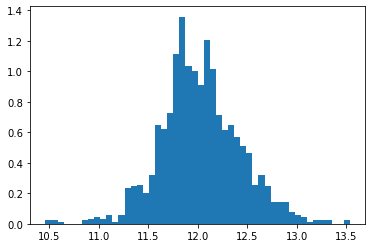

In [417]:
ames['log'] = np.log(ames.SalePrice)

plt.hist(ames['log'], bins=50, density=True)

Text(0, 0.5, 'Sale Price')

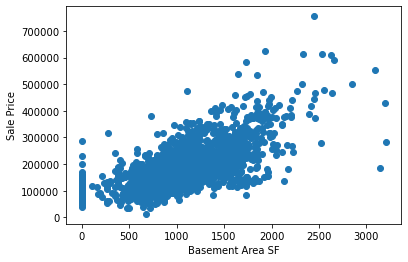

In [28]:
plt.scatter(ames['TotalBsmtSF'], ames['SalePrice'])
plt.xlabel("Basement Area SF")
plt.ylabel("Sale Price")

Text(0, 0.5, 'Sale Price')

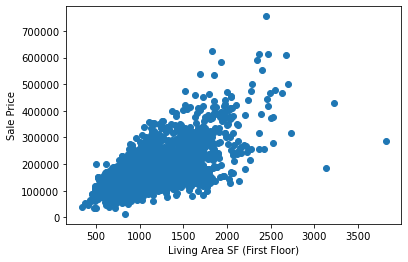

In [29]:
plt.scatter(ames['1stFlrSF'], ames['SalePrice'])
plt.xlabel("Living Area SF (First Floor)")
plt.ylabel("Sale Price")

In [30]:
#What are the three outliers that have high SF and sold for much less than expected?

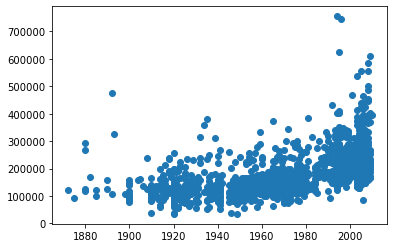

In [421]:
plt.scatter(ames['YearBuilt'], ames['SalePrice'])
#trend of newer houses selling for more

plt.savefig("YearBuilt_SalePrice.png")

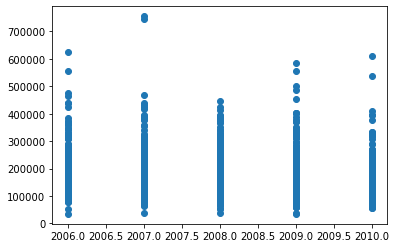

In [422]:
plt.scatter(ames['YrSold'], ames['SalePrice']) #Did the Great Recession have impact on pricing

plt.savefig("YearSold_SalePrice.png")

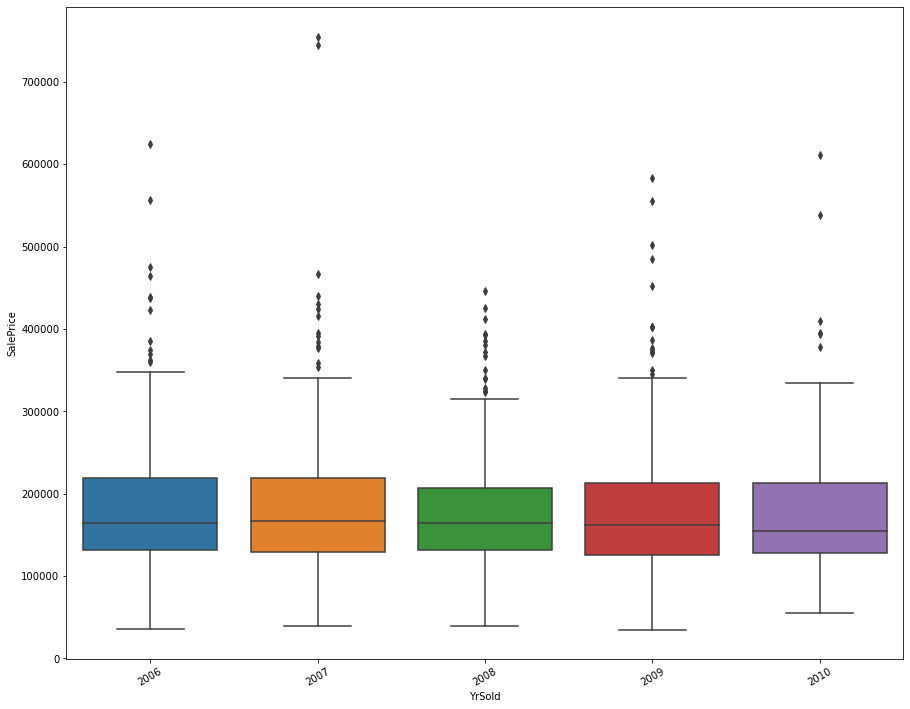

In [454]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=(15, 12))
# sns.swarmplot(ax = ax, x="Neighborhood", y="SalePrice", data=ames)
sns.boxplot(ax = ax, x="YrSold", y="SalePrice", data=ames)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

plt.savefig("year_sold.png")

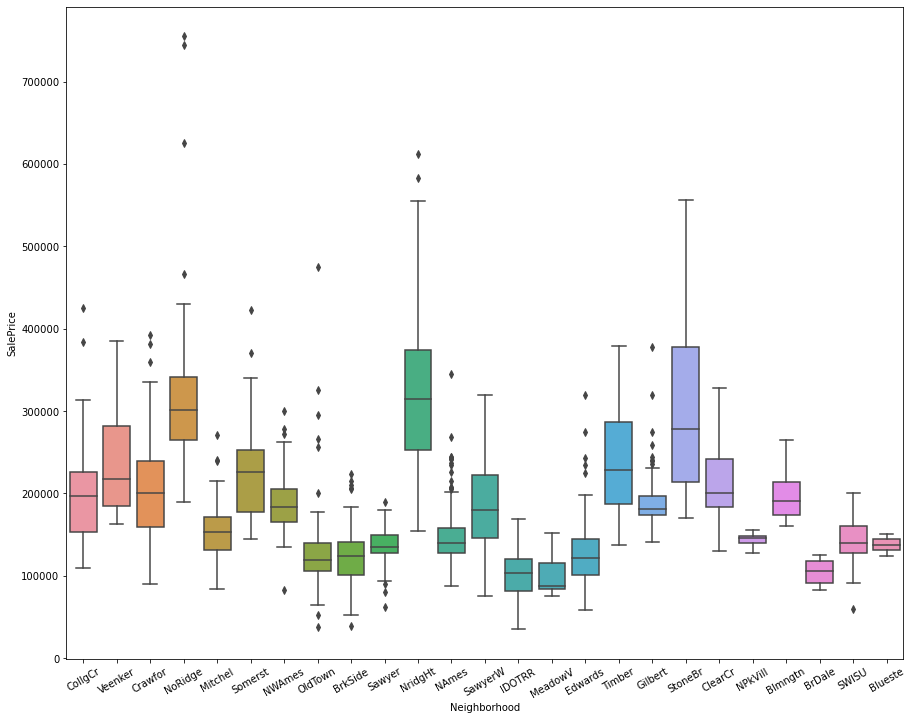

In [399]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=(15, 12))
# sns.swarmplot(ax = ax, x="Neighborhood", y="SalePrice", data=ames)
sns.boxplot(ax = ax, x="Neighborhood", y="SalePrice", data=ames)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

plt.savefig("neighborhoods.png")

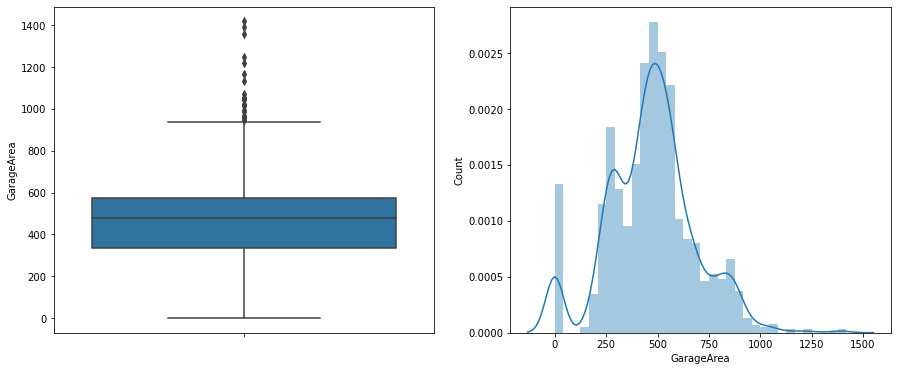

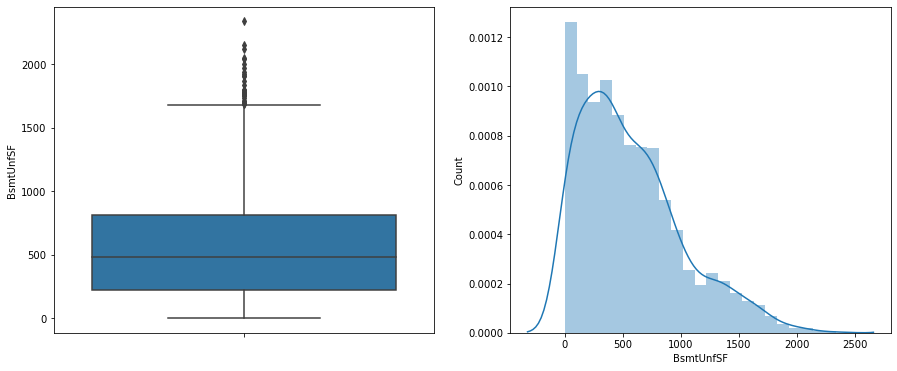

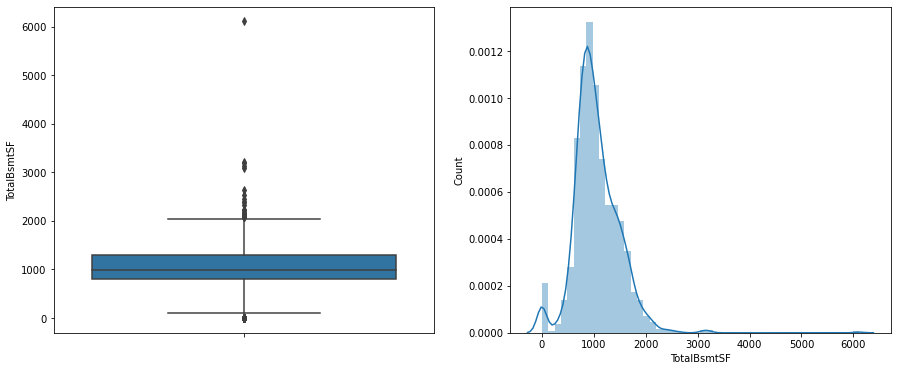

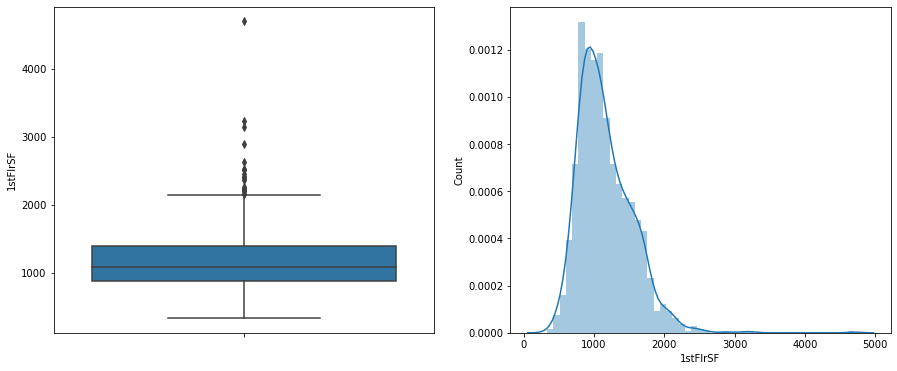

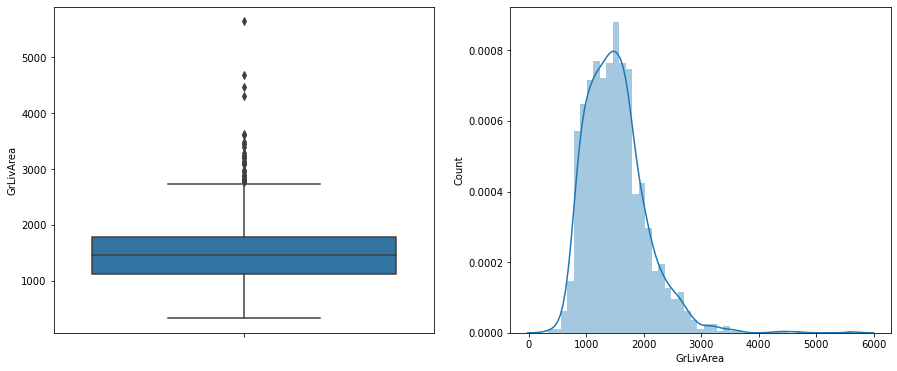

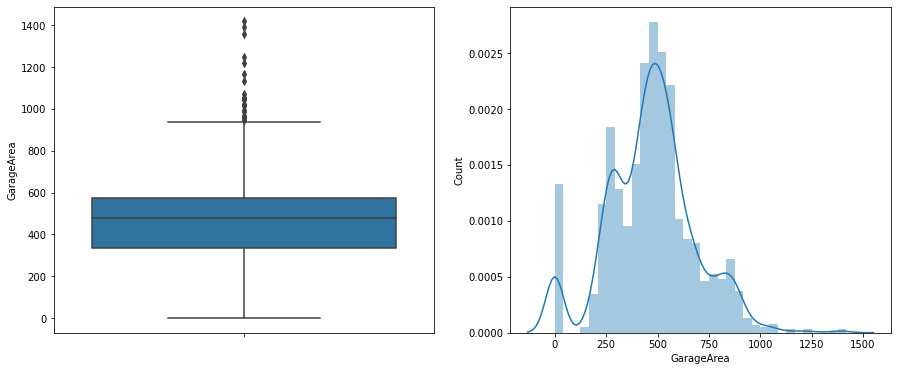

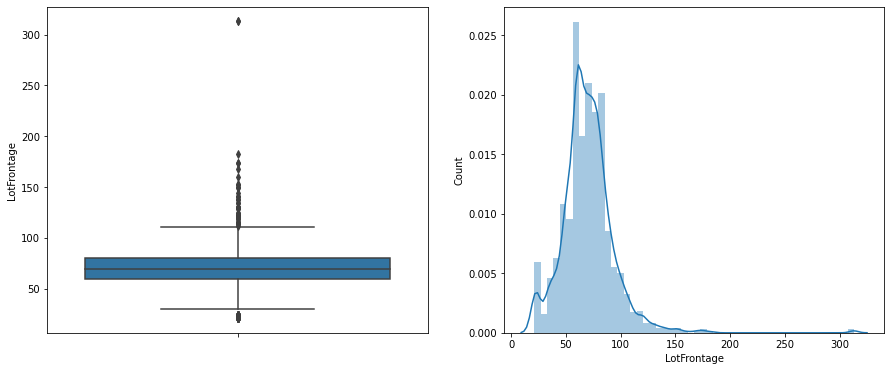

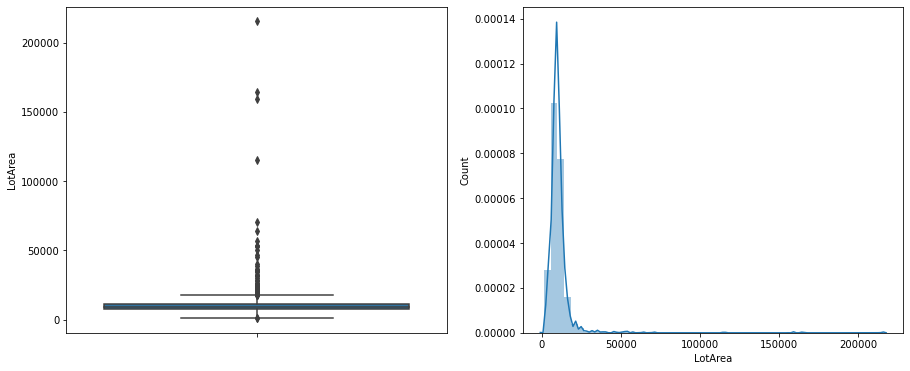

<Figure size 432x288 with 0 Axes>

In [789]:
for var in [ 'GarageArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'LotFrontage', 'LotArea']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=ames[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)


    fig = sns.distplot(ames[var].dropna())#.hist(bins=20)
    fig.set_ylabel('Count')
    fig.set_xlabel(var)
    plt.show()

plt.savefig("skewed_cols.png")


/Users/Brancusi/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   1.,  16.,  14.,  23.,  22.,  36.,  61.,
          93., 287., 443., 268., 116.,  32.,  23.,   5.,   7.,   2.,   5.,
           2.,   0.,   1.,   0.,   2.,   1.],
        [  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.]]),
 array([ 0.03094631,  0.32909882,  0.62725133,  0.92540384,  1.22355635,
         1.52170885,  1.81986136,  2.11801387,  2.41616638,  2.71431889,
         3.0124714 ,  3.31062391,  3.60877642,  3.90692892,  4.20508143,
         4.50323394,  4.80138645,  5.09953896,  5.39769147,  5.69584398,
         5.993

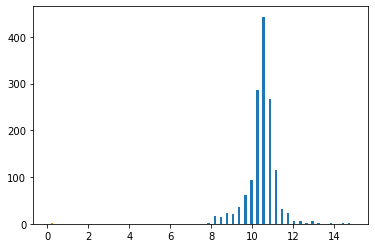

In [397]:
plt.hist(boxcox(ames['LotArea'].dropna()), bins = 50)
# plt.hist(ames['LotArea'].dropna(), bins = 50)

(array([[216.,   0.,   0.,   3.,   7.,  13.,  13.,  16.,  13.,  40.,  51.,
          41.,  58.,  65.,  75.,  79.,  81.,  85.,  96.,  95.,  87., 115.,
          95.,  98.,  89.,  98.,  81.,  83.,  92.,  98.,  94.,  69.,  70.,
          44.,  42.,  39.,  31.,  32.,  36.,  27.,  25.,  33.,  22.,  11.,
           9.,   4.,   5.,   1.,   1.,   1.],
        [  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.]]),
 array([ 0.        ,  1.55172835,  3.1034567 ,  4.65518505,  6.2069134 ,
         7.75864175,  9.3103701 , 10.86209845, 12.4138268 , 13.96555515,
        15.5172835 , 17.06901185, 18.6207402 , 20.17246855, 21.7241969 ,
        23.27592525, 24.8276536 , 26.37938195, 27.9311103 , 29.48283865,
        31.034

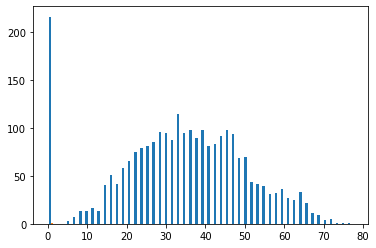

In [142]:
# plt.hist(boxcox(ames['LotFrontage'].dropna()), bins = 50)
plt.hist(boxcox((1+ames['BsmtUnfSF']).dropna()), bins = 50)
# plt.hist(ames['LotFrontage'].dropna(), bins = 50)

(array([[ 68.,   0.,   0.,   1.,   2.,   3.,   6.,   5.,   8.,  29.,  12.,
          51.,  64.,  74., 108., 138., 182., 252., 199., 191., 166., 140.,
         130., 117.,  82.,  94.,  77.,  70.,  78.,  61.,  46.,  25.,  30.,
          17.,  16.,   6.,   6.,   5.,   3.,   2.,   4.,   3.,   2.,   1.,
           0.,   1.,   0.,   0.,   1.,   3.],
        [  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0.        ,  15.30629153,  30.61258307,  45.9188746 ,
         61.22516614,  76.53145767,  91.83774921, 107.14404074,
        122.45033227, 137.75662381, 153.06291534, 168.36920688,
        183.67549841, 198.98178995, 214.28808148, 229.59437301,
        244.90066455, 260.20695608, 275.51324762, 

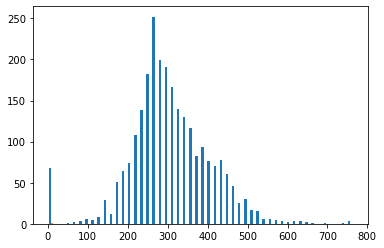

In [37]:
plt.hist(boxcox((1+ames['TotalBsmtSF']).dropna()), bins = 50)

(array([[127.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,  23.,  24.,  49.,
          99., 120., 189.,  74.,  65.,  90., 127., 191., 194., 213., 193.,
         112., 176.,  94.,  56.,  64.,  41.,  36.,  37.,  35.,  42.,  40.,
          23.,  12.,   7.,   6.,   3.,   3.,   2.,   2.,   2.,   1.,   1.,
           0.,   1.,   2.,   1.,   0.,   1.],
        [  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0.        ,   9.29767774,  18.59535548,  27.89303323,
         37.19071097,  46.48838871,  55.78606645,  65.08374419,
         74.38142194,  83.67909968,  92.97677742, 102.27445516,
        111.57213291, 120.86981065, 130.16748839, 139.46516613,
        148.76284387, 158.06052162, 167.35819936, 

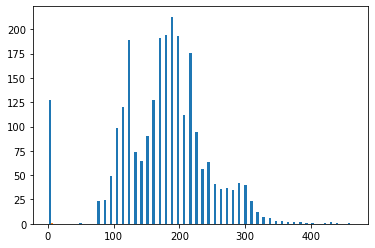

In [38]:
plt.hist(boxcox((1+ames['GarageArea']).dropna()), bins = 50)

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
           2.,   4.,  13.,  27., 153., 234., 326., 358., 454., 467., 254.,
         144., 102.,  27.,   7.,   4.,   2.],
        [  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.]]),
 array([ 0.05897056,  0.2768639 ,  0.49475723,  0.71265056,  0.93054389,
         1.14843722,  1.36633056,  1.58422389,  1.80211722,  2.02001055,
         2.23790388,  2.45579722,  2.67369055,  2.89158388,  3.10947721,
         3.32737054,  3.54526388,  3.76315721,  3.98105054,  4.19894387,
         4.416

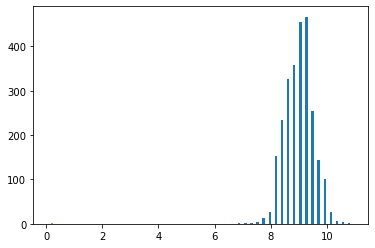

In [39]:
plt.hist(boxcox(ames['GrLivArea'].dropna()), bins = 50)
# plt.hist(ames['GrLivArea'].dropna(), bins = 50)

In [40]:
# plt.hist(boxcox(ames['GrLivArea'].dropna()), bins = 50)
# plt.hist(boxcox(ames['1stFlrSF'].dropna()), bins = 50)
# plt.hist(boxcox(ames['LotFrontage'].dropna()), bins = 50)
# plt.hist(boxcox(ames['TotalBsmtSF']+1), bins = 50)

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   2.,   4.,  40.,  73., 157., 477., 556., 491.,
         376., 292.,  82.,  24.,   4.,   2.],
        [  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.]]),
 array([-0.02497596,  0.12460166,  0.27417928,  0.4237569 ,  0.57333452,
         0.72291214,  0.87248976,  1.02206738,  1.171645  ,  1.32122262,
         1.47080024,  1.62037786,  1.76995548,  1.9195331 ,  2.06911072,
         2.21868834,  2.36826596,  2.51784358,  2.6674212 ,  2.81699882,
         2.966

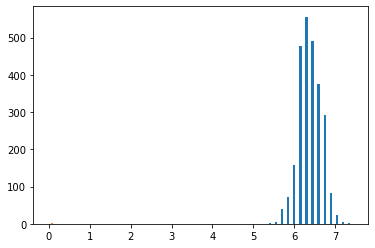

In [41]:
plt.hist(boxcox(ames['1stFlrSF'].dropna()), bins = 50)
# plt.hist(ames['1stFlrSF'].dropna(), bins = 50)

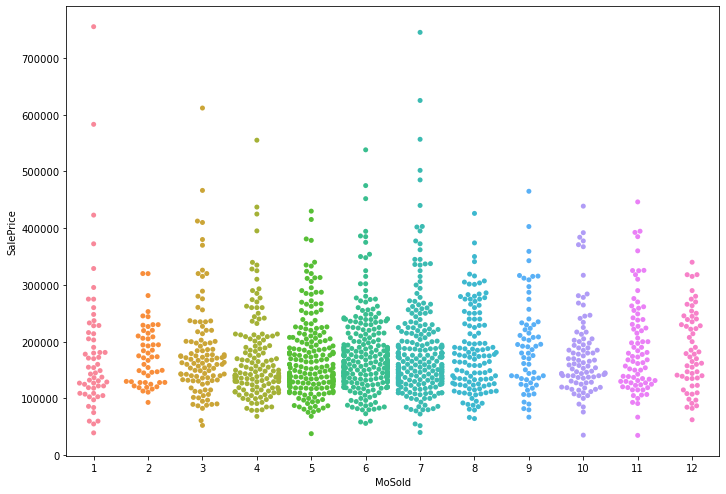

In [425]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
# sns.boxplot(ax= ax, x="MoSold", y="SalePrice", data=ames)
sns.swarmplot(ax = ax, x="MoSold", y="SalePrice", data=ames)

plt.savefig("MonthSold.png")

In [465]:
ames.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [44]:
ames_zone = ames[ames['MSZoning'] != 'C (all)']
#These appear to be Commercial
ames_zone = ames_zone[ames_zone['MSZoning'] != 'I (all)']
#These appear to be Industrial
ames_zone = ames_zone[ames_zone['MSZoning'] != 'A (agr)']
#These appear to be agricultural

In [790]:
ames.groupby('SaleCondition').agg({'SalePrice': ['mean', 'count']})
# ames.groupby('Neighborhood').agg({'SalePrice': 'count'}).sort_values(by='SalePrice', ascending=True)

SalePrice      
                        mean count
SaleCondition                     
Abnorml        146526.623762   101
AdjLand        104125.000000     4
Alloca         167377.416667    12
Family         149600.000000    20
Normal         175202.219533  1198
Partial        272291.752000   125

In [46]:
ames_comm = ames_zone[ames_zone['SaleCondition'] != 'Abnorml'] #abnormal sale condition may not reflect true value
ames_comm = ames_comm[ames_comm['SaleCondition'] != 'Family']#sales to family members likely not full open market value
ames_comm = ames_comm[ames_comm['SaleCondition'] != 'AdjLand']#sales of adjacent land that is not built on

In [868]:
ames_comm[ames_comm['Condition1'] == 'RRNn'].shape

(7, 81)

In [871]:
ames_comm['Condition2'].value_counts()

Norm      2460
Feedr       12
PosA         3
PosN         3
Artery       2
RRNn         2
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [48]:
#Baseline
ols = LinearRegression()
ols.fit( ames_comm[['OverallQual']], ames_comm[['SalePrice']] )

print( round( ols.score( ames_comm[['OverallQual']], ames_comm[['SalePrice']] )*100, 2 ) , '%' )

62.38 %


In [729]:
ols_grlivarea = LinearRegression()

ols.fit( ames_comm[['GrLivArea']], ames_comm[['SalePrice']] )

print( round( ols.score( ames_comm[['GrLivArea']], ames_comm[['SalePrice']] )*100, 2 ) , '%' )

52.59 %


In [49]:
ames_comm[ames_comm['GrLivArea'] > 4500]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
309,908154205,4676,184750,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,0,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial


In [50]:
ames_comm[ames_comm['SaleCondition'] == 'Partial'].head(5)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
7,528228540,1246,187687,20,RL,53.0,3710,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,WdShing,Wd Shng,BrkFace,20.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0.0,Unf,0.0,1146.0,1146.0,GasA,Ex,Y,SBrkr,1246,0,0,0.0,0.0,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,2007.0,Fin,2.0,428.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,3,2008,New,Partial
16,906380120,1274,203000,20,RL,68.0,8814,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2005,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,Gd,TA,PConc,Gd,TA,No,GLQ,925.0,Unf,0.0,349.0,1274.0,GasA,Ex,Y,SBrkr,1274,0,0,1.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2005.0,RFn,2.0,508.0,TA,TA,Y,264,98,0,0,0,0,NaN,NaN,NaN,0,1,2007,New,Partial
21,902201120,789,115000,20,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1948,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,104.0,BLQ,169.0,516.0,789.0,GasA,Ex,Y,SBrkr,789,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1948.0,Unf,1.0,250.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Partial
25,528218100,1458,168165,60,RL,58.0,13204,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,44.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,608.0,608.0,GasA,Ex,Y,SBrkr,608,850,0,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,454.0,TA,TA,Y,100,33,0,0,0,0,NaN,NaN,NaN,0,5,2007,New,Partial
31,528222090,1258,173500,20,RL,64.0,7697,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,6,2007,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1246.0,1246.0,GasA,Ex,Y,SBrkr,1258,0,0,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,RFn,2.0,462.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,New,Partial


In [51]:
ames_eda = ames_comm[ames_comm['GrLivArea'] < 4500] # dropping huge house that sold for well below market - feeling is that it was not finished

In [52]:
ames_eda = ames_eda[ames_eda['Neighborhood'] != 'Landmrk'] #Drop sole landmark location

(array([  1.,   1.,   1.,   2.,   3.,  15.,   5.,  17.,  50.,  49.,  86.,
        158., 268., 324., 284., 264., 226., 195., 149., 125.,  89.,  60.,
         36.,  35.,  19.,  10.,   3.,   5.,   1.,   1.]),
 array([10.46310334, 10.56548233, 10.66786132, 10.77024031, 10.8726193 ,
        10.97499829, 11.07737728, 11.17975627, 11.28213526, 11.38451425,
        11.48689324, 11.58927223, 11.69165122, 11.79403021, 11.89640919,
        11.99878818, 12.10116717, 12.20354616, 12.30592515, 12.40830414,
        12.51068313, 12.61306212, 12.71544111, 12.8178201 , 12.92019909,
        13.02257808, 13.12495707, 13.22733606, 13.32971505, 13.43209404,
        13.53447303]),
 <a list of 30 Patch objects>)

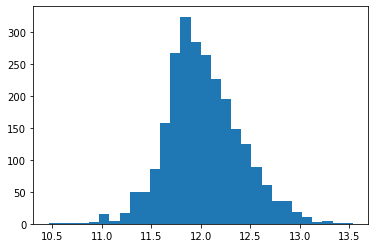

In [54]:
plt.hist(np.log(ames_eda['SalePrice']), bins = 30)

In [55]:
ames_eda['logSalePrice'] = np.log(ames_eda['SalePrice'])

In [56]:
ames_eda.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,logSalePrice
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,11.744037
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,11.845820
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal,11.643954
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,12.332705
5,908128060,1922,198500,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,495,1427,0,0.0,0.0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2.0,672.0,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,12.198544


In [57]:
ames_eda['BasmtLivArea'] = ames_eda['TotalBsmtSF'] - ames_eda['BsmtUnfSF']


In [58]:
ames_eda['TotalBath'] = ames_eda['BsmtFullBath'] + 0.5*ames_eda['BsmtHalfBath'] + ames_eda['FullBath'] + 0.5*ames_eda['HalfBath']

In [59]:
ames_eda['OutsideLivArea'] = ames_eda['WoodDeckSF'] + ames_eda['OpenPorchSF'] + ames_eda['EnclosedPorch'] + ames_eda['ScreenPorch']

In [60]:
ames_eda['Age'] = ames_eda['YrSold'] - ames_eda['YearRemodAdd']


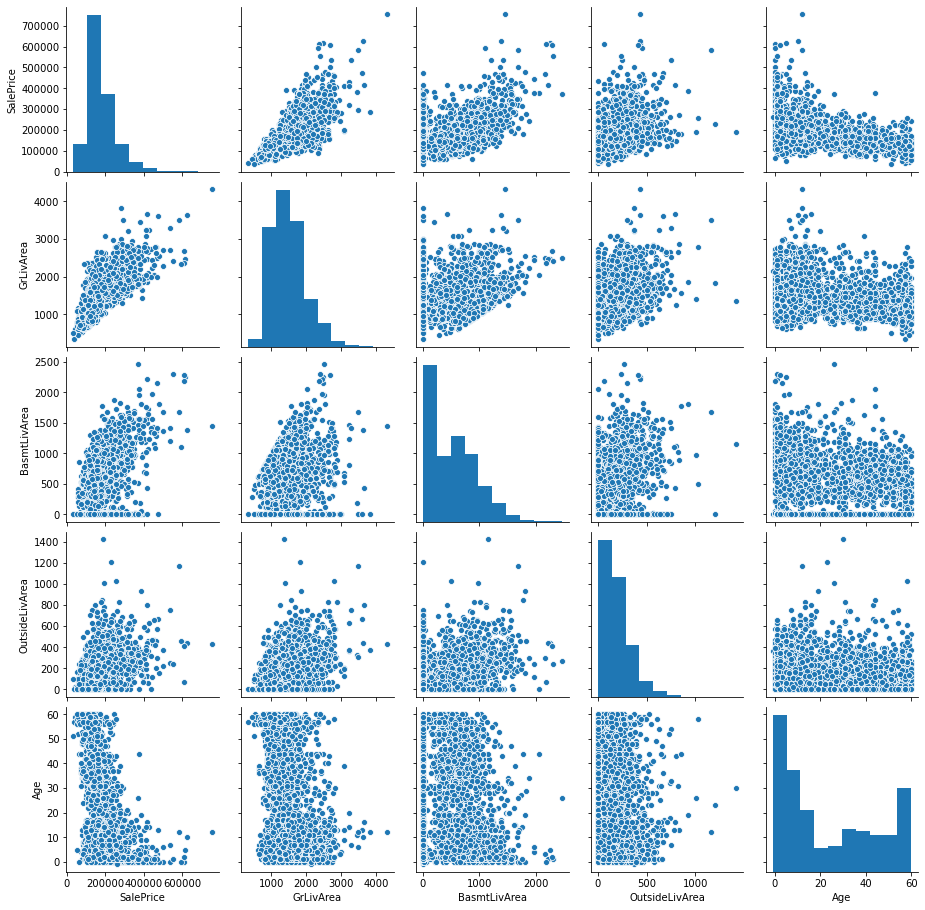

In [430]:
sns.pairplot(ames_eda[['SalePrice', 'GrLivArea', 'BasmtLivArea', 'OutsideLivArea', 'Age']]);

plt.savefig("PairPlot.pdf")

In [62]:
ames_eda['PricePerSqFt'] = round(ames_eda['SalePrice'] / ames_eda['GrLivArea'],2)

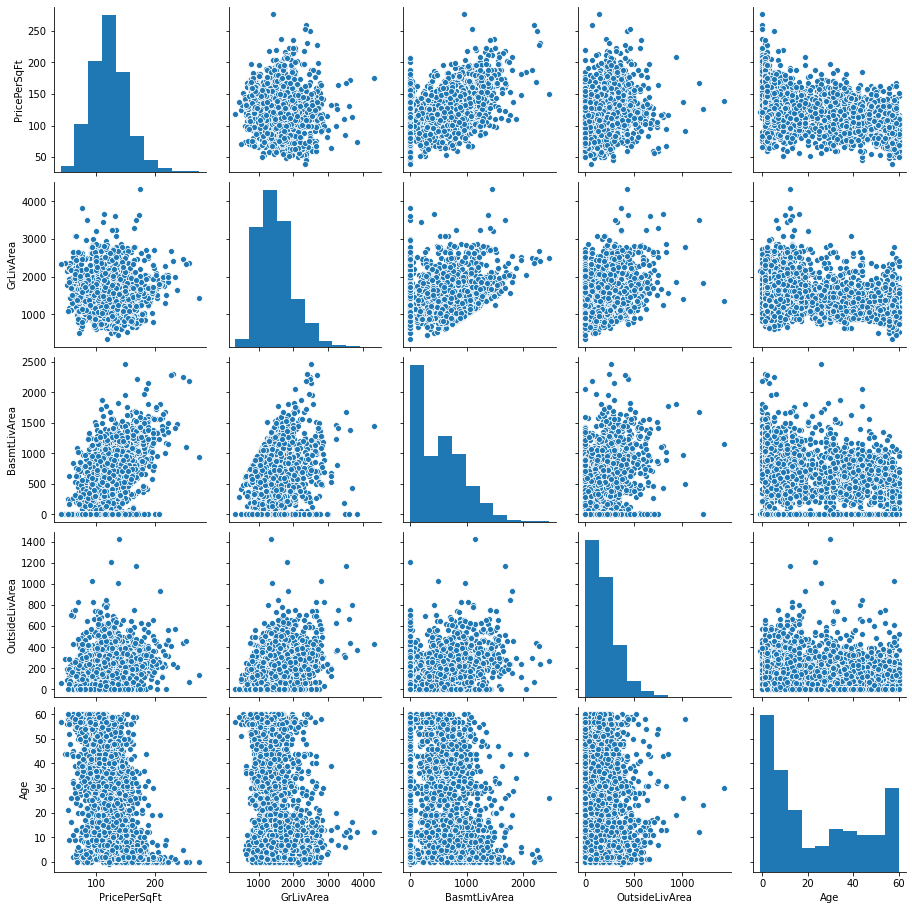

In [432]:
sns.pairplot(ames_eda[['PricePerSqFt', 'GrLivArea', 'BasmtLivArea', 'OutsideLivArea', 'Age']]);

plt.savefig("PairPlot2.pdf")

- Outside living area seems to have a positive impact on total price but no relationship to price per square foot
- Finished basement area on the other hand has both an impact on total price and on price per square foot
- Total living area has a strong relationship to total price but virtually no impact on price per square foot
- Age has a negative relationship with both sale price and price per square foot

### Neighborhoods

In [64]:
ames_loc = ames_eda.copy()

In [772]:
ames_loc['SalePrice'].groupby([ames_loc.Neighborhood]).count().sort_values()

Neighborhood
GrnHill      2
Greens       8
Blueste     10
Veenker     22
NPkVill     22
Blmngtn     23
BrDale      26
MeadowV     34
ClearCr     38
SWISU       40
StoneBr     43
Timber      53
IDOTRR      56
NoRidge     67
Crawfor     90
BrkSide     98
Mitchel    100
SawyerW    109
NWAmes     117
NridgHt    120
Sawyer     135
Gilbert    139
Somerst    141
Edwards    158
OldTown    203
CollgCr    233
NAmes      395
Name: SalePrice, dtype: int64

In [787]:
# Sale Price and PricePerSqFt Analysis
print(round(ames_eda['SalePrice'].groupby(ames_loc.Neighborhood).mean().sort_values(ascending=False),2))
print('*' *50)
round(ames_eda['PricePerSqFt'].groupby(ames_loc.Neighborhood).mean().sort_values(ascending=False), 2)

Neighborhood
NoRidge    326114.30
NridgHt    313026.35
StoneBr    305307.93
GrnHill    280000.00
Veenker    255865.91
Timber     244190.83
Somerst    228450.67
ClearCr    216558.74
Crawfor    202090.80
CollgCr    197208.27
Blmngtn    196237.17
Greens     193531.25
NWAmes     192515.43
Gilbert    189704.32
SawyerW    187403.91
Mitchel    164641.50
NAmes      145778.17
Blueste    143590.00
NPkVill    140743.18
Sawyer     137189.69
Edwards    132715.70
SWISU      132518.75
OldTown    128146.91
BrkSide    126674.23
IDOTRR     118824.79
BrDale     107359.62
MeadowV     96836.47
Name: SalePrice, dtype: float64
**************************************************


Neighborhood
GrnHill    198.66
Greens     168.84
StoneBr    165.61
NridgHt    163.10
Veenker    150.65
Timber     144.19
Somerst    142.72
Blmngtn    138.68
CollgCr    136.68
NoRidge    132.55
Mitchel    131.38
ClearCr    127.29
Blueste    126.22
Sawyer     121.90
Crawfor    119.66
SawyerW    119.03
Gilbert    118.33
NAmes      117.60
NPkVill    116.15
NWAmes     115.92
Edwards    104.49
BrkSide    104.30
BrDale      97.35
IDOTRR      96.89
MeadowV     94.29
OldTown     93.66
SWISU       90.32
Name: PricePerSqFt, dtype: float64

### Zoning

In [67]:
ames_loc.SalePrice.groupby(ames_loc.MSZoning).mean()

MSZoning
FV    215724.009009
RH    129894.736842
RL    188776.168373
RM    127853.592965
Name: SalePrice, dtype: float64

In [68]:
print(ames_loc['Neighborhood'].groupby(ames_loc.MSZoning).count())

MSZoning
FV     111
RH      19
RL    1954
RM     398
Name: Neighborhood, dtype: int64


# Cleaning

In [124]:
df = ames_eda.copy()

In [70]:
# find na

for feature in df:
    if df[feature].isna().sum() > 0:
        print( f' {feature} has {df[feature].isna().sum()} missing values' )

 LotFrontage has 449 missing values
 Alley has 2323 missing values
 MasVnrType has 14 missing values
 MasVnrArea has 14 missing values
 BsmtQual has 66 missing values
 BsmtCond has 66 missing values
 BsmtExposure has 68 missing values
 BsmtFinType1 has 66 missing values
 BsmtFinType2 has 67 missing values
 Electrical has 1 missing values
 BsmtFullBath has 1 missing values
 BsmtHalfBath has 1 missing values
 FireplaceQu has 1178 missing values
 GarageType has 113 missing values
 GarageYrBlt has 115 missing values
 GarageFinish has 115 missing values
 GarageCars has 1 missing values
 GarageArea has 1 missing values
 GarageQual has 115 missing values
 GarageCond has 115 missing values
 PoolQC has 2473 missing values
 Fence has 1980 missing values
 MiscFeature has 2387 missing values
 TotalBath has 1 missing values


### Final Inspection of Remaining Categorical Variables

In [764]:
# df['GarageYrBlt'] = df.apply(lambda row: int(row['YearBuilt']) if np.isnan(row['GarageYrBlt']) else int(row['GarageYrBlt']),
#     axis=1
# )

In [73]:
df['LotConfig'].unique()

array(['Corner', 'Inside', 'FR2', 'CulDSac', 'FR3'], dtype=object)

In [74]:
df['TotalBath'] = df['BsmtFullBath'] + 0.5*df['BsmtHalfBath'] + df['FullBath'] + 0.5*df['HalfBath']

In [76]:
df['LandContour'].value_counts()

Lvl    2252
HLS      93
Bnk      89
Low      48
Name: LandContour, dtype: int64

###  Imputation / Dummifying

In [4]:
class GarageTransformer(TransformerMixin):

    def transform(self, X, **transform_params):
        X['GarageYrBlt'] = X['GarageYrBlt'].fillna(X['YearBuilt'] )
        #TODO  calculate % of total basementSF is finished        
        return X

    def fit(self, X, y=None, **fit_params):
        return self

In [5]:
####### DROPPING DUMMIES ##############
# Dropping: MscFeature, PoolQC, Alley, Fence, SaleType, PID

mapper = DataFrameMapper([
    #ZONING
    
    (['MSSubClass'],[SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first')]),
    #MS Zoning: major differences between the zones.
    (['MSZoning'], [SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first')]),
    
    #LOT INFORMATION
    
    (['LotFrontage'],[SimpleImputer(strategy='median')]),
    (['LotArea'],[SimpleImputer(strategy='median')]),
    (['LotShape'], OneHotEncoder(drop='first')),
    (['LandContour'], OneHotEncoder(drop='first')),
    (['LotConfig'], OneHotEncoder(drop='first')),
    (['LandSlope'], OneHotEncoder(drop='first')),
#     (['Condition1'], OneHotEncoder(drop='first')),
#     (['Condition2'], OneHotEncoder(drop='first')),
    (['BldgType'], OneHotEncoder(drop='first')),
    (['HouseStyle'], OneHotEncoder(drop='first')),
    
    (['OverallQual'], [SimpleImputer(strategy='median')]),
    (['OverallCond'],[SimpleImputer(strategy='median')]),
    #SHOULD DROP YEAR BUILT SINCE THIS IS IN YearRemodAdd
    (['YearBuilt'], None),
    (['YearRemodAdd'], None),
    (['Neighborhood'], [SimpleImputer(strategy = 'most_frequent'), OneHotEncoder(drop='first')]),
    (['RoofStyle'], [SimpleImputer(strategy = 'most_frequent'), OneHotEncoder(drop='first')]),
    (['RoofMatl'],[SimpleImputer(strategy = 'most_frequent'), OneHotEncoder(drop='first')]),
    (['Exterior1st'],[SimpleImputer(strategy = 'most_frequent'), OneHotEncoder(drop='first')]),
    (['Exterior2nd'],[SimpleImputer(strategy = 'most_frequent'), OneHotEncoder(drop='first')]),
    (['MasVnrType'],[SimpleImputer(strategy ='constant', fill_value='None'), OneHotEncoder(drop='first')]),
    # for masonry veneer, all houses with None for veneer in the dataset have 0 for the veneer area, so we'll do the same here
    (['MasVnrArea'], [SimpleImputer(strategy='constant', fill_value=0.0)]),
    # Ranked (Ordinal) column
    (['ExterQual'],  [SimpleImputer(strategy='constant', fill_value='TA'), 
                      OrdinalEncoder(categories = [['Fa', 'TA', 'Gd','Ex']])]),
    (['ExterCond'], [SimpleImputer(strategy='constant', fill_value='TA'), OrdinalEncoder(categories = [['Po','Fa','TA', 'Gd','Ex']]) ]),
    (['Foundation'], [SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first')]),
    
    #BASEMENT
    
    # converted to rank BsmtCond; count missing values as not having a basement
    (['BsmtCond'], [SimpleImputer(strategy='constant', fill_value='NA'), OrdinalEncoder(categories = [['NA', 'Po','Fa','TA', 'Gd','Ex']]) ]),
    (['BsmtQual'], [SimpleImputer(strategy='constant', fill_value='NA'), OrdinalEncoder(categories = [['NA', 'Po','Fa','TA', 'Gd','Ex']]) ]),
    (['BsmtExposure'], [SimpleImputer(strategy='constant', fill_value='No'), OrdinalEncoder(categories = [['No','Mn','Av', 'Gd']]) ]),
    (['BsmtFinType1'], [SimpleImputer(strategy = 'constant', fill_value='Unf'), OneHotEncoder(drop='first')]),
    (['BsmtFinType2'], [SimpleImputer(strategy='constant', fill_value='Unf'), OneHotEncoder(drop='first')]),
    # Finished Basement Square Footage
    (['BsmtFinSF1'], [SimpleImputer(strategy ='constant', fill_value=0)]),
    (['BsmtFinSF2'], [SimpleImputer(strategy ='constant', fill_value=0)]),
    # Unfinished Basement square footage
    (['BsmtUnfSF'], [SimpleImputer(strategy='constant', fill_value=0)]),
    (['TotalBsmtSF'], [SimpleImputer(strategy='constant', fill_value=0)]),
    (['Heating'], [SimpleImputer(strategy = 'most_frequent'), OneHotEncoder(drop='first')]),
    
    # ELECTRICAL
    (['HeatingQC'], [SimpleImputer(strategy='constant', fill_value='TA'), OrdinalEncoder(categories=[['Po','Fa','TA', 'Gd','Ex']]) ]),
    (['CentralAir'],  [SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first')]),
    (['Electrical'],[SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first')]),
    
    # LIVING SPACE
    (['1stFlrSF'], [SimpleImputer(strategy='most_frequent')]),
    (['2ndFlrSF'], [SimpleImputer(strategy='most_frequent')]),
    (['LowQualFinSF'], [SimpleImputer(strategy='constant', fill_value=0)]),
    (['GrLivArea'], [SimpleImputer(strategy='most_frequent')]),
    (['BsmtFullBath'], [SimpleImputer(strategy='constant', fill_value=0)]),
    (['BsmtHalfBath'], [SimpleImputer(strategy='constant', fill_value=0)]),
    (['FullBath'], [SimpleImputer(strategy='most_frequent')]),
    (['HalfBath'], [SimpleImputer(strategy='constant', fill_value=0)]),
    (['BedroomAbvGr'], [SimpleImputer(strategy='most_frequent')]),
    (['KitchenAbvGr'], [SimpleImputer(strategy='most_frequent')]),
    (['KitchenQual'], [SimpleImputer(strategy='constant', fill_value='TA'), OrdinalEncoder(categories = [['Po','Fa','TA', 'Gd','Ex']]) ]),
    (['TotRmsAbvGrd'], [SimpleImputer(strategy='most_frequent')]),
    (['Functional'], [SimpleImputer(strategy='constant', fill_value='Typ'), OrdinalEncoder(categories = [['Sal', 'Sev','Maj2','Maj1', 'Mod','Min2', 'Min1','Typ']]) ]),
    (['Fireplaces'], [SimpleImputer(fill_value=0)]),
    (['FireplaceQu'], [SimpleImputer(strategy='constant', fill_value='NA'), OrdinalEncoder(categories = [['NA', 'Po','Fa','TA', 'Gd','Ex']]) ]),
    
    # GARAGE
    (['GarageType'],[SimpleImputer(strategy='constant', fill_value='None'), OneHotEncoder(drop='first')]),
    (['GarageYrBlt'], None),
    (['GarageFinish'], [SimpleImputer(strategy='constant', fill_value='Unf'), OneHotEncoder(drop='first')]), 
    (['GarageCars'],[SimpleImputer(strategy='constant', fill_value=0)]),
    (['GarageArea'], [SimpleImputer(strategy='median')]),
    (['GarageQual'], [SimpleImputer(strategy='constant', fill_value='TA'), OrdinalEncoder(categories = [['Po','Fa','TA', 'Gd','Ex']]) ]),
    (['GarageCond'], [SimpleImputer(strategy='constant', fill_value='TA'), OrdinalEncoder(categories = [['Po','Fa','TA', 'Gd','Ex']]) ]),
    (['PavedDrive'],  [OneHotEncoder()]), # y/n value
    
    # OUTSIDE
    (['WoodDeckSF'], [SimpleImputer(strategy='constant', fill_value=0)]),
    (['OpenPorchSF'], [SimpleImputer(strategy='constant', fill_value=0)]),
    (['EnclosedPorch'], [SimpleImputer(strategy='constant', fill_value=1)]),
    (['3SsnPorch'], [SimpleImputer(strategy='constant', fill_value=1)]),
    (['PoolArea'], [SimpleImputer(strategy='constant', fill_value=0)]),
    (['MiscVal'], [SimpleImputer(strategy='constant', fill_value=0)]),
    
    # TIMING
    (['MoSold'], [SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first')]), # month isn't really a ranking -- probably better to bin it
    (['YrSold'], [OneHotEncoder(drop='first')]),
    
#     #REMOVED
#     #('PoolQC', [CategoricalImputer(replacement='NA'), CustomOrdinalEncoder(['NA', 'Po','Fa','TA', 'Gd','Ex']) ]),
#     #('Fence', [CategoricalImputer(replacement='None'), LabelBinarizer()]),
#     #('MiscFeature', [CategoricalImputer(replacement='None'), LabelBinarizer()]),
#     #(['SaleType'], [SimpleImputer(strategy='constant', fill_value='WD'), OneHotEncoder()])
    
    ], df_out=True)

In [41]:
##### NOT DROPPING DUMMIES #######

#Dropping: MscFeature, PoolQC, Alley, Fence, SaleType, PID

mapperXGB = DataFrameMapper([
    #ZONING
    
    (['MSSubClass'],[SimpleImputer(strategy='most_frequent'), LabelEncoder()]),
    #MS Zoning: major differences between the zones.
    (['MSZoning'], [SimpleImputer(strategy='most_frequent'), LabelEncoder()]),
    
    #LOT INFORMATION
    
    (['LotFrontage'],[SimpleImputer(strategy='median')]),
    (['LotArea'],[SimpleImputer(strategy='median')]),
    (['LotShape'], OneHotEncoder()),
    (['LandContour'], OneHotEncoder()),
    (['LotConfig'], OneHotEncoder()),
    (['LandSlope'], OneHotEncoder()),
#     (['Condition1'], [SimpleImputer(strategy = 'most_frequent'), LabelEncoder()]),
#     (['Condition2'], [SimpleImputer(strategy = 'most_frequent'), LabelEncoder()]),
    (['BldgType'], LabelEncoder()),
    (['HouseStyle'], LabelEncoder()),
    (['OverallQual'], [SimpleImputer(strategy='median')]),
    (['OverallCond'],[SimpleImputer(strategy='median')]),
    (['YearBuilt'], None),
    (['YearRemodAdd'], None),
    (['Neighborhood'], [SimpleImputer(strategy = 'most_frequent'), LabelEncoder()]),
    (['RoofStyle'], [SimpleImputer(strategy = 'most_frequent'), LabelEncoder()]),
    (['RoofMatl'],[SimpleImputer(strategy = 'most_frequent'), LabelEncoder()]),
    (['Exterior1st'],[SimpleImputer(strategy = 'most_frequent'), LabelEncoder()]),
    (['Exterior2nd'],[SimpleImputer(strategy = 'most_frequent'), LabelEncoder()]),
    (['MasVnrType'],[SimpleImputer(strategy ='constant', fill_value='None'), LabelEncoder()]),
    # for masonry veneer, all houses with None for veneer in the dataset have 0 for the veneer area, so we'll do the same here
    (['MasVnrArea'], [SimpleImputer(strategy='constant', fill_value=0.0)]),
    # Ranked (Ordinal) column
    (['ExterQual'],  [SimpleImputer(strategy='constant', fill_value='TA'), 
                      LabelEncoder()]),
    (['ExterCond'], [SimpleImputer(strategy='constant', fill_value='TA'), LabelEncoder() ]),
    (['Foundation'], [SimpleImputer(strategy='most_frequent'), LabelEncoder()]),
    
    #BASEMENT
    
    # converted to rank BsmtCond; count missing values as not having a basement
    (['BsmtCond'], [SimpleImputer(strategy='constant', fill_value='NA'), LabelEncoder() ]),
    (['BsmtQual'], [SimpleImputer(strategy='constant', fill_value='NA'), LabelEncoder() ]),
    (['BsmtExposure'], [SimpleImputer(strategy='constant', fill_value='No'), LabelEncoder() ]),
    (['BsmtFinType1'], [SimpleImputer(strategy = 'constant', fill_value='Unf'), LabelEncoder()]),
    (['BsmtFinType2'], [SimpleImputer(strategy='constant', fill_value='Unf'), LabelEncoder()]),
    # Finished Basement Square Footage
    (['BsmtFinSF1'], [SimpleImputer(strategy ='constant', fill_value=0)]),
    (['BsmtFinSF2'], [SimpleImputer(strategy ='constant', fill_value=0)]),
    # Unfinished Basement square footage
    (['BsmtUnfSF'], [SimpleImputer(strategy='constant', fill_value=0)]),
    (['TotalBsmtSF'], [SimpleImputer(strategy='constant', fill_value=0)]),
    (['Heating'], [SimpleImputer(strategy = 'most_frequent'), LabelEncoder()]),
    
    # ELECTRICAL
    (['HeatingQC'], [SimpleImputer(strategy='constant', fill_value='TA'), LabelEncoder() ]),
    (['CentralAir'],  [SimpleImputer(strategy='most_frequent'), LabelEncoder()]),
    (['Electrical'],[SimpleImputer(strategy='most_frequent'), LabelEncoder()]),
    
    # LIVING SPACE
    (['1stFlrSF'], [SimpleImputer(strategy='median')]),
    (['2ndFlrSF'], [SimpleImputer(strategy='median')]),
    (['LowQualFinSF'], [SimpleImputer(strategy='constant', fill_value=0)]),
    (['GrLivArea'], [SimpleImputer(strategy='median')]),
    (['BsmtFullBath'], [SimpleImputer(strategy='constant', fill_value=0)]),
    (['BsmtHalfBath'], [SimpleImputer(strategy='constant', fill_value=0)]),
    (['FullBath'], [SimpleImputer(strategy='most_frequent')]),
    (['HalfBath'], [SimpleImputer(strategy='constant', fill_value=0)]),
    (['BedroomAbvGr'], [SimpleImputer(strategy='most_frequent')]),
    (['KitchenAbvGr'], [SimpleImputer(strategy='most_frequent')]),
    (['KitchenQual'], [SimpleImputer(strategy='constant', fill_value='TA'), LabelEncoder() ]),
    (['TotRmsAbvGrd'], [SimpleImputer(strategy='most_frequent')]),
    (['Functional'], [SimpleImputer(strategy='constant', fill_value='Typ'), LabelEncoder() ]),
    (['Fireplaces'], [SimpleImputer(fill_value=0), StandardScaler()]),
    (['FireplaceQu'], [SimpleImputer(strategy='constant', fill_value='NA'), LabelEncoder() ]),
    
    # GARAGE
    (['GarageType'],[SimpleImputer(strategy='constant', fill_value='None'), LabelEncoder()]),
    (['GarageYrBlt'], None),
    (['GarageFinish'], [SimpleImputer(strategy='constant', fill_value='Unf'), LabelEncoder()]), 
    (['GarageCars'],[SimpleImputer(strategy='constant', fill_value=0)]),
    (['GarageArea'], [SimpleImputer(strategy='median')]),
    (['GarageQual'], [SimpleImputer(strategy='constant', fill_value='TA'), LabelEncoder() ]),
    (['GarageCond'], [SimpleImputer(strategy='constant', fill_value='TA'), LabelEncoder() ]),
    (['PavedDrive'],  [LabelBinarizer()]), # y/n value
    
    # OUTSIDE
    (['WoodDeckSF'], [SimpleImputer(strategy='constant', fill_value=0)]),
    (['OpenPorchSF'], [SimpleImputer(strategy='constant', fill_value=0)]),
    (['EnclosedPorch'], [SimpleImputer(strategy='constant', fill_value=1)]),
    (['3SsnPorch'], [SimpleImputer(strategy='constant', fill_value=1)]),
    (['PoolArea'], [SimpleImputer(strategy='constant', fill_value=0)]),
    (['MiscVal'], [SimpleImputer(strategy='constant', fill_value=0)]),
    
    # TIMING
    (['MoSold'], None), # month isn't really a ranking -- probably better to bin it
    (['YrSold'], None),
    
    #REMOVED
    #('PoolQC', [CategoricalImputer(replacement='NA'), CustomOrdinalEncoder(['NA', 'Po','Fa','TA', 'Gd','Ex']) ]),
    #('Fence', [CategoricalImputer(replacement='None'), LabelBinarizer()]),
    #('MiscFeature', [CategoricalImputer(replacement='None'), LabelBinarizer()]),
    #(['SaleType'], [SimpleImputer(strategy='constant', fill_value='WD'), OneHotEncoder()])
    
    ], df_out=True)

In [23]:
df = ames.copy()

In [513]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Adjusting Columns

In [26]:
df = df[df['MSZoning'] != 'C (all)'] #Drop commercial

In [27]:
X = df.loc[:, df.columns != 'SalePrice']

In [28]:
y = df['SalePrice']

In [29]:
y = np.log1p(y)

### Train Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .05, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1377, 80), (73, 80), (1377,), (73,))

In [800]:
y_train

618     12.659737
870     11.603689
92      12.004574
817     12.509878
302     12.230770
          ...    
763     12.727841
835     11.759793
1216    11.626263
559     12.363081
684     12.305923
Name: SalePrice, Length: 1168, dtype: float64

### Pipeline

In [31]:
pipe = Pipeline([
    ('map', mapper),
    ('feature_gen', GarageTransformer()),
])

In [32]:
pipe = pipe.fit(X_train)
X_train = pipe.transform(X_train)
X_train.head()

,MSSubClass_x0_30,MSSubClass_x0_40,MSSubClass_x0_45,MSSubClass_x0_50,MSSubClass_x0_60,MSSubClass_x0_70,MSSubClass_x0_75,MSSubClass_x0_80,MSSubClass_x0_85,MSSubClass_x0_90,MSSubClass_x0_120,MSSubClass_x0_160,MSSubClass_x0_180,MSSubClass_x0_190,MSZoning_x0_RH,MSZoning_x0_RL,MSZoning_x0_RM,LotFrontage,LotArea,LotShape_x0_IR2,LotShape_x0_IR3,LotShape_x0_Reg,LandContour_x0_HLS,LandContour_x0_Low,LandContour_x0_Lvl,LotConfig_x0_CulDSac,LotConfig_x0_FR2,LotConfig_x0_FR3,LotConfig_x0_Inside,LandSlope_x0_Mod,LandSlope_x0_Sev,BldgType_x0_2fmCon,BldgType_x0_Duplex,BldgType_x0_Twnhs,BldgType_x0_TwnhsE,HouseStyle_x0_1.5Unf,HouseStyle_x0_1Story,HouseStyle_x0_2.5Fin,HouseStyle_x0_2.5Unf,HouseStyle_x0_2Story,HouseStyle_x0_SFoyer,HouseStyle_x0_SLvl,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Neighborhood_x0_Blueste,Neighborhood_x0_BrDale,Neighborhood_x0_BrkSide,Neighborhood_x0_ClearCr,Neighborhood_x0_CollgCr,Neighborhood_x0_Crawfor,Neighborhood_x0_Edwards,Neighborhood_x0_Gilbert,Neighborhood_x0_IDOTRR,Neighborhood_x0_MeadowV,Neighborhood_x0_Mitchel,Neighborhood_x0_NAmes,Neighborhood_x0_NPkVill,Neighborhood_x0_NWAmes,Neighborhood_x0_NoRidge,Neighborhood_x0_NridgHt,Neighborhood_x0_OldTown,Neighborhood_x0_SWISU,Neighborhood_x0_Sawyer,Neighborhood_x0_SawyerW,Neighborhood_x0_Somerst,Neighborhood_x0_StoneBr,Neighborhood_x0_Timber,Neighborhood_x0_Veenker,RoofStyle_x0_Gable,RoofStyle_x0_Gambrel,RoofStyle_x0_Hip,RoofStyle_x0_Mansard,RoofStyle_x0_Shed,RoofMatl_x0_CompShg,RoofMatl_x0_Membran,RoofMatl_x0_Metal,RoofMatl_x0_Roll,RoofMatl_x0_Tar&Grv,RoofMatl_x0_WdShake,RoofMatl_x0_WdShngl,Exterior1st_x0_AsphShn,Exterior1st_x0_BrkComm,Exterior1st_x0_BrkFace,Exterior1st_x0_CBlock,Exterior1st_x0_CemntBd,Exterior1st_x0_HdBoard,Exterior1st_x0_ImStucc,Exterior1st_x0_MetalSd,Exterior1st_x0_Plywood,Exterior1st_x0_Stone,Exterior1st_x0_Stucco,Exterior1st_x0_VinylSd,Exterior1st_x0_Wd Sdng,Exterior1st_x0_WdShing,Exterior2nd_x0_AsphShn,Exterior2nd_x0_Brk Cmn,Exterior2nd_x0_BrkFace,Exterior2nd_x0_CBlock,Exterior2nd_x0_CmentBd,Exterior2nd_x0_HdBoard,Exterior2nd_x0_ImStucc,Exterior2nd_x0_MetalSd,Exterior2nd_x0_Other,Exterior2nd_x0_Plywood,Exterior2nd_x0_Stone,Exterior2nd_x0_Stucco,Exterior2nd_x0_VinylSd,Exterior2nd_x0_Wd Sdng,Exterior2nd_x0_Wd Shng,MasVnrType_x0_BrkFace,MasVnrType_x0_None,MasVnrType_x0_Stone,MasVnrArea,ExterQual,ExterCond,Foundation_x0_CBlock,Foundation_x0_PConc,Foundation_x0_Slab,Foundation_x0_Stone,Foundation_x0_Wood,BsmtCond,BsmtQual,BsmtExposure,BsmtFinType1_x0_BLQ,BsmtFinType1_x0_GLQ,BsmtFinType1_x0_LwQ,BsmtFinType1_x0_Rec,BsmtFinType1_x0_Unf,BsmtFinType2_x0_BLQ,BsmtFinType2_x0_GLQ,BsmtFinType2_x0_LwQ,BsmtFinType2_x0_Rec,BsmtFinType2_x0_Unf,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating_x0_GasA,Heating_x0_GasW,Heating_x0_Grav,Heating_x0_OthW,Heating_x0_Wall,HeatingQC,CentralAir,Electrical_x0_FuseF,Electrical_x0_FuseP,Electrical_x0_Mix,Electrical_x0_SBrkr,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType_x0_Attchd,GarageType_x0_Basment,GarageType_x0_BuiltIn,GarageType_x0_CarPort,GarageType_x0_Detchd,GarageType_x0_None,GarageYrBlt,GarageFinish_x0_RFn,GarageFinish_x0_Unf,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive_x0_N,PavedDrive_x0_P,PavedDrive_x0_Y,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold_x0_2,MoSold_x0_3,MoSold_x0_4,MoSold_x0_5,MoSold_x0_6,MoSold_x0_7,MoSold_x0_8,MoSold_x0_9,MoSold_x0_10,MoSold_x0_11,MoSold_x0_12,YrSold_x0_2007,YrSold_x0_2008,YrSold_x0_2009,YrSold_x0_2010
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,63.0,8199.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,5.0,2005.0,2005.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

In [33]:
X_test = pipe.transform( X_test )

In [855]:
X_test.head()

,MSSubClass_x0_30,MSSubClass_x0_40,MSSubClass_x0_45,MSSubClass_x0_50,MSSubClass_x0_60,MSSubClass_x0_70,MSSubClass_x0_75,MSSubClass_x0_80,MSSubClass_x0_85,MSSubClass_x0_90,MSSubClass_x0_120,MSSubClass_x0_160,MSSubClass_x0_180,MSSubClass_x0_190,MSZoning_x0_FV,MSZoning_x0_RH,MSZoning_x0_RL,MSZoning_x0_RM,LotFrontage,LotArea,LotShape_x0_IR2,LotShape_x0_IR3,LotShape_x0_Reg,LandContour_x0_HLS,LandContour_x0_Low,LandContour_x0_Lvl,LotConfig_x0_CulDSac,LotConfig_x0_FR2,LotConfig_x0_FR3,LotConfig_x0_Inside,LandSlope_x0_Mod,LandSlope_x0_Sev,Condition1_x0_Feedr,Condition1_x0_Norm,Condition1_x0_PosA,Condition1_x0_PosN,Condition1_x0_RRAe,Condition1_x0_RRAn,Condition1_x0_RRNe,Condition1_x0_RRNn,Condition2_x0_Feedr,Condition2_x0_Norm,Condition2_x0_PosA,Condition2_x0_PosN,Condition2_x0_RRAe,Condition2_x0_RRAn,Condition2_x0_RRNn,BldgType_x0_2fmCon,BldgType_x0_Duplex,BldgType_x0_Twnhs,BldgType_x0_TwnhsE,HouseStyle_x0_1.5Unf,HouseStyle_x0_1Story,HouseStyle_x0_2.5Fin,HouseStyle_x0_2.5Unf,HouseStyle_x0_2Story,HouseStyle_x0_SFoyer,HouseStyle_x0_SLvl,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Neighborhood_x0_Blueste,Neighborhood_x0_BrDale,Neighborhood_x0_BrkSide,Neighborhood_x0_ClearCr,Neighborhood_x0_CollgCr,Neighborhood_x0_Crawfor,Neighborhood_x0_Edwards,Neighborhood_x0_Gilbert,Neighborhood_x0_IDOTRR,Neighborhood_x0_MeadowV,Neighborhood_x0_Mitchel,Neighborhood_x0_NAmes,Neighborhood_x0_NPkVill,Neighborhood_x0_NWAmes,Neighborhood_x0_NoRidge,Neighborhood_x0_NridgHt,Neighborhood_x0_OldTown,Neighborhood_x0_SWISU,Neighborhood_x0_Sawyer,Neighborhood_x0_SawyerW,Neighborhood_x0_Somerst,Neighborhood_x0_StoneBr,Neighborhood_x0_Timber,Neighborhood_x0_Veenker,RoofStyle_x0_Gable,RoofStyle_x0_Gambrel,RoofStyle_x0_Hip,RoofStyle_x0_Mansard,RoofStyle_x0_Shed,RoofMatl_x0_CompShg,RoofMatl_x0_Membran,RoofMatl_x0_Metal,RoofMatl_x0_Roll,RoofMatl_x0_Tar&Grv,RoofMatl_x0_WdShake,RoofMatl_x0_WdShngl,Exterior1st_x0_AsphShn,Exterior1st_x0_BrkComm,Exterior1st_x0_BrkFace,Exterior1st_x0_CBlock,Exterior1st_x0_CemntBd,Exterior1st_x0_HdBoard,Exterior1st_x0_ImStucc,Exterior1st_x0_MetalSd,Exterior1st_x0_Plywood,Exterior1st_x0_Stone,Exterior1st_x0_Stucco,Exterior1st_x0_VinylSd,Exterior1st_x0_Wd Sdng,Exterior1st_x0_WdShing,Exterior2nd_x0_AsphShn,Exterior2nd_x0_Brk Cmn,Exterior2nd_x0_BrkFace,Exterior2nd_x0_CBlock,Exterior2nd_x0_CmentBd,Exterior2nd_x0_HdBoard,Exterior2nd_x0_ImStucc,Exterior2nd_x0_MetalSd,Exterior2nd_x0_Other,Exterior2nd_x0_Plywood,Exterior2nd_x0_Stone,Exterior2nd_x0_Stucco,Exterior2nd_x0_VinylSd,Exterior2nd_x0_Wd Sdng,Exterior2nd_x0_Wd Shng,MasVnrType_x0_BrkFace,MasVnrType_x0_None,MasVnrType_x0_Stone,MasVnrArea,ExterQual,ExterCond,Foundation_x0_CBlock,Foundation_x0_PConc,Foundation_x0_Slab,Foundation_x0_Stone,Foundation_x0_Wood,BsmtCond,BsmtQual,BsmtExposure,BsmtFinType1_x0_BLQ,BsmtFinType1_x0_GLQ,BsmtFinType1_x0_LwQ,BsmtFinType1_x0_Rec,BsmtFinType1_x0_Unf,BsmtFinType2_x0_BLQ,BsmtFinType2_x0_GLQ,BsmtFinType2_x0_LwQ,BsmtFinType2_x0_Rec,BsmtFinType2_x0_Unf,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating_x0_GasA,Heating_x0_GasW,Heating_x0_Grav,Heating_x0_OthW,Heating_x0_Wall,HeatingQC,CentralAir,Electrical_x0_FuseF,Electrical_x0_FuseP,Electrical_x0_Mix,Electrical_x0_SBrkr,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType_x0_Attchd,GarageType_x0_Basment,GarageType_x0_BuiltIn,GarageType_x0_CarPort,GarageType_x0_Detchd,GarageType_x0_None,GarageYrBlt,GarageFinish_x0_RFn,GarageFinish_x0_Unf,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive_x0_N,PavedDrive_x0_P,PavedDrive_x0_Y,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold_x0_2,MoSold_x0_3,MoSold_x0_4,MoSold_x0_5,MoSold_x0_6,MoSold_x0_7,MoSold_x0_8,MoSold_x0_9,MoSold_x0_10,MoSold_x0_11,MoSold_x0_12,YrSold_x0_2007,YrSold_x0_2008,YrSold_x0_2009,YrSold_x0_2010
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70.049958,32668.0,0.0,0.0,0.0,0.0,0

In [482]:
# double check for nulls
for col in X_train.columns:
    if X_train[col].isnull().sum() >0:
        print(col)

### OLS

In [34]:
ols = LinearRegression(normalize=True)

ols.fit( X_train, y_train )
ols.score (X_train, y_train )

0.9317415650574435

In [837]:
predictions = ols.predict( X_train )

In [745]:
print('Mean Squared Error:', metrics.mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', (metrics.mean_squared_error(y_train, predictions))**0.5) 

Mean Squared Error: 0.00988020476462338
Root Mean Squared Error: 0.09939921913487741


In [746]:
error_term = (y_train - predictions)

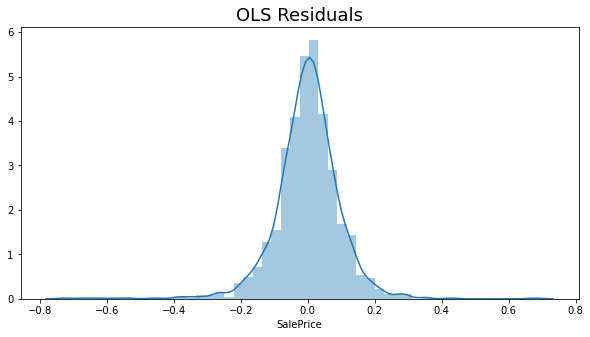

In [722]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(error_term, bins=50, kde=True, ax=ax)
plt.title('OLS Residuals', fontsize=18)
plt.show()

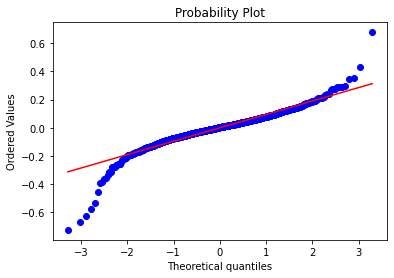

In [758]:
from scipy import stats
stats.probplot(error_term, dist='norm', plot=plt)
# sm.qqplot(error_term, dist='norm')
plt.show()

In [727]:
df_unscaled_coef = pd.DataFrame(ols.coef_, index=X_train.columns, columns=['Coefficients'])
df_unscaled_coef['Coef_abs'] = df_unscaled_coef.Coefficients.abs()
df_unscaled_coef.sort_values(by = 'Coef_abs', ascending=False)

,Coefficients,Coef_abs
MSSubClass_x0_90,-8.626803e+12,8.626803e+12
BldgType_x0_Duplex,8.626803e+12,8.626803e+12
PavedDrive_x0_Y,4.071497e+12,4.071497e+12
PavedDrive_x0_N,4.071497e+12,4.071497e+12
PavedDrive_x0_P,4.071497e+12,4.071497e+12
...,...,...
EnclosedPorch,6.955737e-05,6.955737e-05
OpenPorchSF,4.658382e-05,4.658382e-05
MasVnrArea,3.512455e-05,3.512455e-05
LotArea,2.355991e-06,2.355991e-06


In [35]:
ols.score( X_test, y_test )

0.9139127093836317

In [748]:
predictions_test = ols.predict( X_test )

In [750]:
ols_residuals_test = y_test - predictions_test

In [749]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_test)) 
print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, predictions_test))**0.5)

Mean Squared Error: 0.011664130009968353
Root Mean Squared Error: 0.10800060189632442


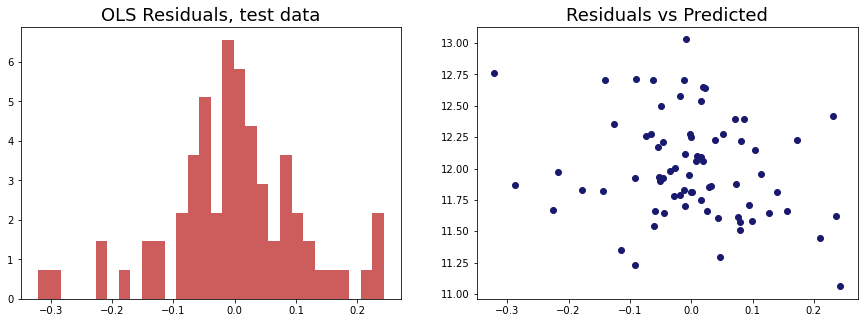

In [751]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].hist(ols_residuals_test, density=True, bins=30, color='indianred')
ax[0].set_title('OLS Residuals, test data', fontsize=18)
ax[1].scatter(ols_residuals_test, predictions_test, color='midnightblue')
ax[1].set_title('Residuals vs Predicted', fontsize=18);

In [622]:
y_ = y_train.values.reshape(-1,1)
sm_ols = sm.OLS( y_, X_train )

ans = sm_ols.fit()

xlabels = X_train.columns
print( ans.summary() )

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     83.66
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:07:35   Log-Likelihood:                 1235.5
No. Observations:                1387   AIC:                            -2043.
Df Residuals:                    1173   BIC:                            -922.8
Df Model:                         213                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
MSSubClass_x0_30          

### Feature Engineering - Box Cox

In [585]:
def boxcox_transformation(var):
    X_train[var], param = boxcox(X_train[var]+1) 
    X_test[var], param = boxcox(X_test[var]+1) 

In [817]:
boxcox_transformation('LotArea')
boxcox_transformation('BsmtUnfSF')
boxcox_transformation('TotalBsmtSF')
boxcox_transformation('GrLivArea')
boxcox_transformation('1stFlrSF')

### Feature Engineering - Polynomial

In [562]:
def add_polynomialfeatures(df):
    poly = PolynomialFeatures(include_bias=False, degree=2)
    features = ['OverallQual', 'GrLivArea']
    X_poly = poly.fit_transform(df[features])
    poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names(features))
    # drop the original columns so we can concatenate this with our original dataframe
    poly_df.drop(columns=features, axis=1, inplace=True)
    newcols = poly_df.columns
    #print(list(newcols))
    #df[list(newcols)] = poly_df[newcols].values
    for col in newcols:
        df[col] = poly_df[col].values
    return df

In [563]:
X_train=add_polynomialfeatures(X_train)
X_test=add_polynomialfeatures(X_test)

In [487]:
X_train.columns

Index(['MSSubClass_x0_30', 'MSSubClass_x0_40', 'MSSubClass_x0_45',
       'MSSubClass_x0_50', 'MSSubClass_x0_60', 'MSSubClass_x0_70',
       'MSSubClass_x0_75', 'MSSubClass_x0_80', 'MSSubClass_x0_85',
       'MSSubClass_x0_90',
       ...
       'MoSold_x0_10', 'MoSold_x0_11', 'MoSold_x0_12', 'YrSold_x0_2007',
       'YrSold_x0_2008', 'YrSold_x0_2009', 'YrSold_x0_2010', 'OverallQual^2',
       'OverallQual GrLivArea', 'GrLivArea^2'],
      dtype='object', length=221)

### Penalized Regression

In [37]:
lasso = Lasso(normalize=True, max_iter=4000)

param_grid = {'alpha' : [.0001, .1, 1, 2, 3, 5, 10, 18]}

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)

grid_lasso = GridSearchCV(lasso, param_grid, cv=kf5)

grid_lasso.fit(X_train, y_train);

model = grid_lasso.best_estimator_

print(grid_lasso.best_params_ , grid_lasso.best_estimator_.score(X_train, y_train))

{'alpha': 0.0001} 0.90907813242951


In [38]:
model.score( X_test, y_test )

0.9014111851331611

### XGBoost

In [52]:
xgb = xgb.XGBRegressor()

xgb.fit ( X_trainXGB, y_trainXGB)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
features = list(zip(xgb.feature_importances_, X_testXGB.columns.values))

features.sort(reverse=True)

for feature in features:
    print( feature )

(0.25009382, 'OpenPorchSF')
(0.18007404, 'RoofMatl')
(0.13072282, 'BsmtFullBath')
(0.04892547, 'KitchenAbvGr')
(0.041562814, '2ndFlrSF')
(0.041145865, 'GarageCond')
(0.03936167, 'GarageArea')
(0.024096724, 'GarageType')
(0.020976432, 'LandContour')
(0.015703736, 'Exterior1st')
(0.011941798, 'BsmtUnfSF')
(0.011071382, 'CentralAir')
(0.009025162, 'MasVnrType')
(0.008733411, 'GarageYrBlt')
(0.008538233, 'GarageCars')
(0.008092429, 'KitchenQual')
(0.0076215495, 'PavedDrive')
(0.0067316233, 'PoolQC')
(0.00575084, 'FullBath')
(0.0051689357, 'YearBuilt')
(0.005149608, 'LotFrontage')
(0.0049549285, 'PoolArea')
(0.0048659705, 'Exterior2nd')
(0.0046441793, 'ScreenPorch')
(0.0044895266, 'HalfBath')
(0.004271281, 'MoSold')
(0.0041489205, 'Heating')
(0.0039250758, 'BsmtFinSF2')
(0.0039113844, 'MSSubClass')
(0.0036385208, 'GarageFinish')
(0.003548531, 'Fireplaces')
(0.003335389, 'TotalBsmtSF')
(0.0031821968, 'MasVnrArea')
(0.0030519208, 'Condition2')
(0.0029805822, 'Electrical')
(0.00297971, 'Founda